<a href="https://colab.research.google.com/github/varunpandey471/Natural-_Language_Processing/blob/main/Case_Study_Using_TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings

In [2]:
TicketData=pd.DataFrame(data=[['Hi Please reset my password, i am not able to reset it','P3'],
                              ['Hi Please reset my password','P3'],
                              ['Hi The system is down please restart it', 'P1'],
                              ['Not able to login can you check?', 'P3'],
                              ['The data is not getting exported', 'P2'],
                               ], columns=['Text','Priority'])

In [3]:
TicketData

,Text,Priority
0,"Hi Please reset my password, i am not able to ...",P3
1,Hi Please reset my password,P3
2,Hi The system is down please restart it,P1
3,Not able to login can you check?,P3
4,The data is not getting exported,P2


In [4]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 

In [5]:
corpus=TicketData['Text'].values


In [6]:
corpus

array(['Hi Please reset my password, i am not able to reset it',
       'Hi Please reset my password',
       'Hi The system is down please restart it',
       'Not able to login can you check?',
       'The data is not getting exported'], dtype=object)

In [7]:
# Generating the Vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

In [8]:
# Converting the input text to TF-IDF matrix
X = vectorizer.fit_transform(corpus)

In [9]:
# Printing the final words selected in the TF-IDF matrix
print(vectorizer.get_feature_names())

['able', 'check', 'data', 'exported', 'getting', 'hi', 'login', 'password', 'reset', 'restart']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
import pandas as pd
VectorizedText=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
VectorizedText['originalText']=pd.Series(corpus)
VectorizedText

,able,check,data,exported,getting,hi,login,password,reset,restart,originalText
0,0.386650,0.000000,0.00000,0.00000,0.00000,0.320954,0.000000,0.386650,0.773300,0.000000,"Hi Please reset my password, i am not able to ..."
1,0.000000,0.000000,0.00000,0.00000,0.00000,0.506204,0.000000,0.609818,0.609818,0.000000,Hi Please reset my password
2,0.000000,0.000000,0.00000,0.00000,0.00000,0.556451,0.000000,0.000000,0.000000,0.830881,Hi The system is down please restart it
3,0.495524,0.614189,0.00000,0.00000,0.00000,0.000000,0.614189,0.000000,0.000000,0.000000,Not able to login can you check?
4,0.000000,0.000000,0.57735,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,The data is not getting exported


In [11]:

# Example Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
DataForML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
DataForML['Priority']=TicketData['Priority']
DataForML.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,check,data,exported,getting,hi,login,password,reset,restart,Priority
0,0.386650,0.000000,0.00000,0.00000,0.00000,0.320954,0.000000,0.386650,0.773300,0.000000,P3
1,0.000000,0.000000,0.00000,0.00000,0.00000,0.506204,0.000000,0.609818,0.609818,0.000000,P3
2,0.000000,0.000000,0.00000,0.00000,0.00000,0.556451,0.000000,0.000000,0.000000,0.830881,P1
3,0.495524,0.614189,0.00000,0.00000,0.00000,0.000000,0.614189,0.000000,0.000000,0.000000,P3
4,0.000000,0.000000,0.57735,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,P2


Case Study Using Support ticket classification
This data contains 19,796 rows and 2 columns. The column”body” represents the ticket description and the column “urgency” represents the Priority.

In [12]:
import numpy as np
TicketData=pd.read_csv('/content/drive/MyDrive/supportTicketData.csv')

In [13]:
TicketData.head()

,body,urgency
0,connection issues with assigned address hi fac...,P1
1,cannot access hi cannot access fallowing link ...,P2
2,re address shown valid dear colleagues remarke...,P1
3,sent tuesday critical alert following alert oc...,P2
4,code spelling mistake hello should discover fo...,P2


In [14]:
print(TicketData.shape)

(19796, 2)


In [15]:
TicketData['urgency'].unique()

array(['P1', 'P2', 'P3'], dtype=object)

In [16]:
TicketData.groupby(['urgency']).count()

,body
urgency,
P1,6748
P2,5528
P3,7520


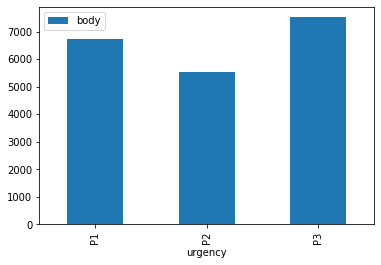

In [17]:
TicketData.groupby(['urgency']).count().plot(kind='bar')

In [18]:
corpus=TicketData['body'].values

In [19]:
corpus

array(['connection issues with assigned address hi facing connection issues number en tried changing cable switch with working ones works for colleagues machine still luck problem must be with address if change works can you please assist further thank you',
       'cannot access hi cannot access fallowing link get blank cannot proceed can you please help with thanks',
       're address shown valid dear colleagues remarked name written wrong could you please be change thank you compliance officer frankfurt main frankfurt main sent address shown valid dear colleagues could you please check why we have issues with address for we had yesterday same issue with another colleague thank you compliance officer frankfurt main frankfurt main sent welcome hi can you please check what going with address please print screen below sent thursday undeliverable welcome failed these or groups address you entered be found please check recipient address try message if problem continues please contact you

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')

In [21]:
vectorizer

TfidfVectorizer(stop_words='english')

In [22]:
X = vectorizer.fit_transform(corpus)

In [23]:
X

<19796x9099 sparse matrix of type '<class 'numpy.float64'>'
	with 464014 stored elements in Compressed Sparse Row format>

In [24]:
# Preparing Data frame For machine learning
# Priority column acts as a target variable and other columns as predictors
DataForML=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
DataForML['Priority']=TicketData['urgency']
print(DataForML.shape)
DataForML.head()

(19796, 9100)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ab,abandon,abandoned,abc,abeam,abilities,ability,able,abnormal,abnormally,...,zig,zip,zipped,zipper,zipping,zone,zones,zoom,zooming,Priority
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P2


There are too many predictor columns(9099!), hence we use PCA to reduce the number of columns.

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [26]:
TargetVariable=DataForML.columns[-1]
Predictors=DataForML.columns[:-1]
X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

In [27]:
NumComponents=5000
pca = PCA(n_components=NumComponents)

In [54]:
# fitting the data
pca_fit=pca.fit(X)

In [55]:
# calculating the principal components
reduced_X = pca_fit.transform(X)

[ 1.28  2.25  3.08 ... 95.36 95.36 95.36]


Text(0, 0.5, '% Variance explained')

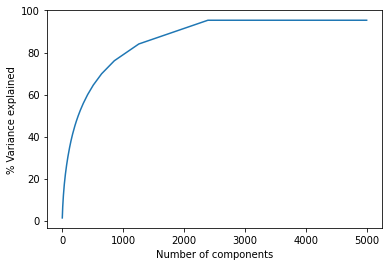

In [56]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)
# Look for the elbow in the plot
plt.plot( range(1,len(var_explained_cumulative)+1), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [57]:
# Creating 2100 Principal components based on the above curve
NumComponents=2100
pca = PCA(n_components=NumComponents)
 
# fitting the data
pca_fit=pca.fit(X)
 
# calculating the principal components
reduced_X = pca_fit.transform(X)

In [58]:
X=reduced_X
# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1,NumComponents+1)).apply(str)).values
Predictors

array(['PC1', 'PC2', 'PC3', ..., 'PC2098', 'PC2099', 'PC2100'],
      dtype=object)

In [59]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

PredictorScaler=MinMaxScaler()
 
# Storing the fit object for later reference
X=PredictorScaler.fit_transform(X)
 

 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)
 
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13857, 2100)
(13857,)
(5939, 2100)
(5939,)


In [66]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB()
mn.fit(X_train,y_train)
pred=mn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,f1_score
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
F1_Score=f1_score(y_test, pred, average='weighted')
print(F1_Score)

[[ 325    0 1681]
 [ 177    0 1476]
 [   9    0 2271]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          P1       0.64      0.16      0.26      2006
          P2       0.00      0.00      0.00      1653
          P3       0.42      1.00      0.59      2280

    accuracy                           0.44      5939
   macro avg       0.35      0.39      0.28      5939
weighted avg       0.38      0.44      0.31      5939

0.3134442481289705


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 

Accuracy_Values=cross_val_score(mn, X , y, cv=5, scoring='f1_weighted')
print('\nAccuracy values for 5-fold Cross Validation:\n',Accuracy_Values)


Accuracy values for 5-fold Cross Validation:
 [0.24238379 0.2695637  0.30015052 0.26453348 0.27480081]


##Logistic Regression


In [69]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=5,penalty='l2', solver='newton-cg')


lg.fit(X_train,y_train)

# Generating predictions on testing data
prediction=lg.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData[TargetVariable]=y_test
TestingData['Prediction']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2
# Logistic Regression


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.170558  0.305704  0.320970  0.377645  0.300440  0.512070  0.328977   
1  0.059201  0.601946  0.716625  0.346003  0.197000  0.510065  0.323403   
2  0.169765  0.369158  0.204437  0.341261  0.279360  0.344128  0.309593   
3  0.163876  0.341312  0.193034  0.424293  0.302156  0.433852  0.399580   
4  0.192141  0.266889  0.231490  0.357927  0.278806  0.429476  0.451059   

        PC8       PC9      PC10  ...    PC2093    PC2094    PC2095    PC2096  \
0  0.475587  0.417384  0.370245  ...  0.472463  0.493978  0.450441  0.508756   
1  0.371535  0.366961  0.375005  ...  0.508218  0.432506  0.478137  0.505604   
2  0.537349  0.394151  0.405068  ...  0.454364  0.444315  0.502791  0.488440   
3  0.560354  0.423645  0.362899  ...  0.495718  0.431587  0.502232  0.500609   
4  0.565867  0.436759  0.322583  ...  0.539952  0.443587  0.410447  0.485082   

     PC2097    PC2098    PC2099    PC2100  Priority  Prediction  
0 

In [74]:
# Importing cross validation function from sklearn
#from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(lg, X , y, cv=2, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeClassifier(max_depth=5)
              precision    recall  f1-score   support

          P1       0.55      0.73      0.63      2006
          P2       0.49      0.25      0.33      1653
          P3       0.84      0.89      0.86      2280

    accuracy                           0.66      5939
   macro avg       0.63      0.62      0.61      5939
weighted avg       0.64      0.66      0.64      5939

[[1468  328  210]
 [1052  417  184]
 [ 144  111 2025]]
Accuracy of the model on Testing Sample Data: 0.64


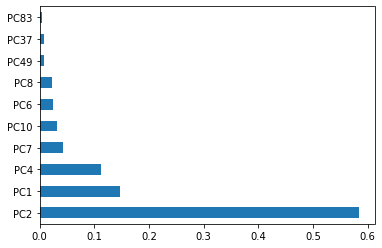

In [75]:

# Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=5,criterion='gini')
 
# Printing all the parameters of Decision Trees
print(clf)
 
# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
 
# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
 
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))
 
# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
 
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
 
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
#Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
#print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
#print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))